In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')

## Violin plot for plotting a quantitative variable (fuel efficiency) vs Qual variable (vehicle class)

In [6]:
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [11]:
fuel_econ.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

### converting VClass to Categorical data type with built in small to large ordering

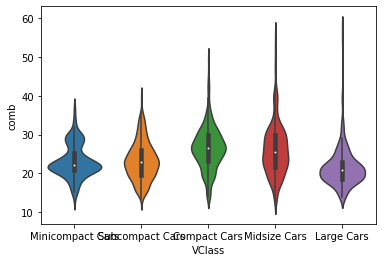

In [12]:
#types of sedan cars

#creating list with order from small to large
sedan_classes =['Minicompact Cars', 'Subcompact Cars', 'Compact Cars','Midsize Cars','Large Cars']

#Returns the types of sedan_classes with the categories and orderedness
#refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

#violin plot
sns.violinplot(data=fuel_econ, x='VClass', y='comb');

since color is not meaningful here we should change all the colors to one using sns.colorpalette()

we can also remove the mini boxplot and tilt the xlabels so they are more readable

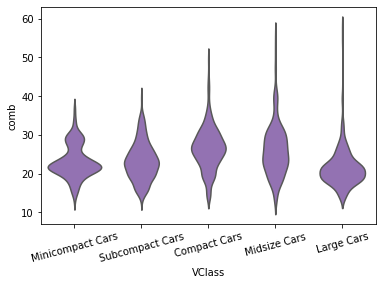

In [14]:
base_color = sns.color_palette()[4]

sns.violinplot(data=fuel_econ, x='VClass', y='comb', inner=None, color=base_color)
#tilting xlabels
plt.xticks(rotation=15);

''

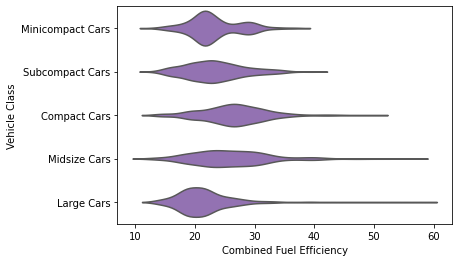

In [17]:
sns.violinplot(data=fuel_econ, x='comb', y='VClass', color=base_color, inner=None)
plt.xlabel('Combined Fuel Efficiency')
plt.ylabel('Vehicle Class')
;

## Boxplots are good for displaying descriptive statistics more clearly than violin plots

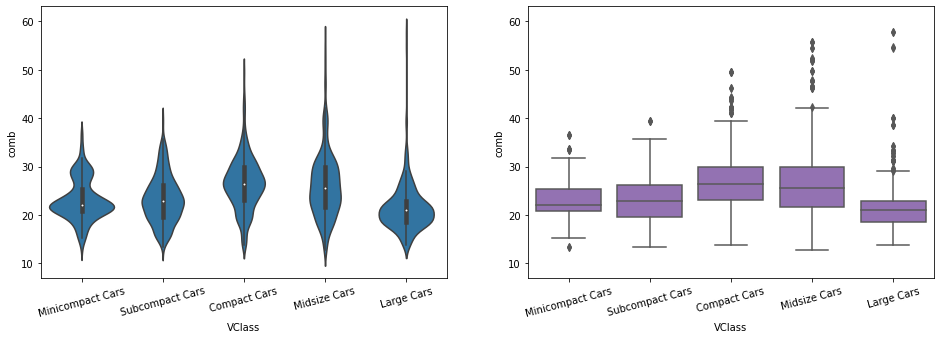

In [19]:
#plotting both types of plots side by side

plt.figure(figsize=[16,5])
base_color_1 = sns.color_palette()[0]
base_color_2 = sns.color_palette()[4]

#plotting the violin plot to the left
plt.subplot(1,2,1)
#defining the violin plot as an axes object
ax1 = sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color_1)
plt.xticks(rotation=15);

#plotting the box plot to the right
plt.subplot(1,2,2)
sns.boxplot(data=fuel_econ, x="VClass", y='comb', color = base_color_2)
plt.xticks(rotation=15);

#setting y-axis limits for the right plot to be the same as the limits on the left plot
plt.ylim(ax1.get_ylim());

#### A note about box plot outliers and whiskers
by default, the maximum range set on the whisker length is 1.5 times the IQR (Q3-Q1). points above this value or below this value from the top or bottom of the box are depicted as points.  The whisker is set to the next point above or below this point.

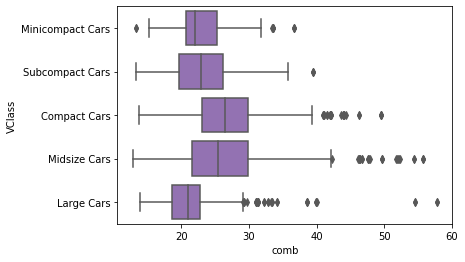

In [21]:
#just like violin plots, box plots can be plotted horizontally
sns.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color_2);

## Quartile information can be plotted in violin plots as well

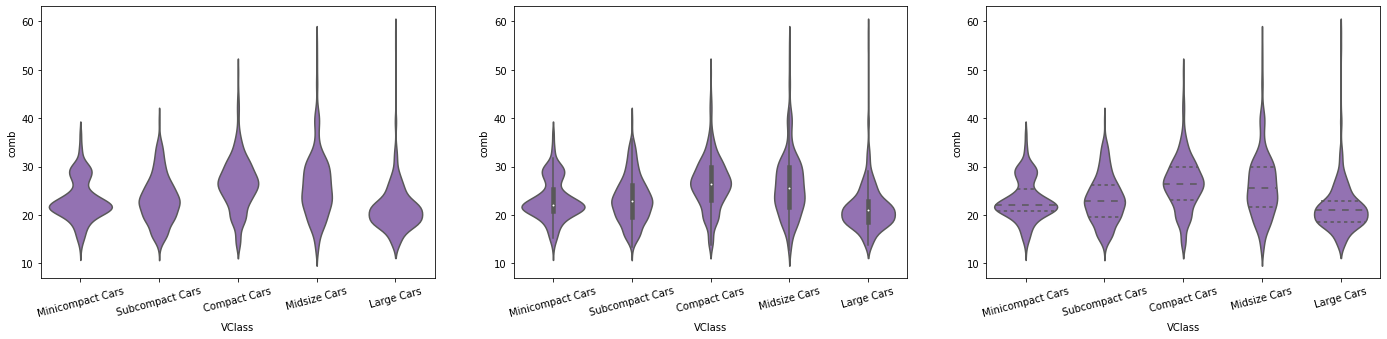

In [25]:
plt.figure(figsize=[24, 5])

plt.subplot(1,3,1)
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color_2, inner=None);
plt.xticks(rotation=15);

plt.subplot(1,3,2)
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color_2);
plt.xticks(rotation=15);

plt.subplot(1,3,3)
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color_2, inner='quartile');
plt.xticks(rotation=15);